This code can be used to get all the uploaded input 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mridangam-dataset-4junesac/dheem.wav
/kaggle/input/mridangam-dataset-4junesac/chapu.wav
/kaggle/input/mridangam-dataset-4junesac/ta.wav
/kaggle/input/mridangam-dataset-4junesac/thom2.wav
/kaggle/input/mridangam-dataset-4junesac/thikutharikidathaka.wav
/kaggle/input/mridangam-dataset-4junesac/thom3.wav
/kaggle/input/mridangam-dataset-4junesac/Dhi.wav
/kaggle/input/mridangam-dataset-4junesac/thi.wav
/kaggle/input/mridangam-dataset-4junesac/num.wav
/kaggle/input/mridangam-dataset-4junesac/chapu2.wav
/kaggle/input/mridangam-dataset-4junesac/dheem2.wav
/kaggle/input/mridangam-dataset-4junesac/thom.wav
/kaggle/input/mridangam-dataset-4junesac/Tha.wav
/kaggle/input/mridangam-dataset-4junesac/Dheem3.wav
/kaggle/input/6june-210/bheem3.wav
/kaggle/input/6june-210/thi1.wav
/kaggle/input/6june-210/tha2.wav
/kaggle/input/6june-210/thom1.wav
/kaggle/input/6june-210/thi3.wav
/kaggle/input/6june-210/bheem1-2.wav
/kaggle/input/6june-210/thom2.wav
/kaggle/input/6june-210/chappu3.wav
/kaggl

In [2]:
%pip install compiam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 MB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 59.6 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ | / - \ done
  Getting requirements to build wheel ... - \ | / done
  Preparing metadata (pyproject.toml) ... - \ | / - \ | / - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.3/792.3 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 16.7

In [3]:
## Importing compiam to the project
import compiam

# Import extras and supress warnings to keep the tutorial clean
import os
import random
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

## This part is directly copied from compiam. 
https://mtg.github.io/IAM-tutorial-ismir22/timbre_analysis/stroke-classification.html

In [4]:
from compiam.timbre.stroke_classification import MridangamStrokeClassification
msc=MridangamStrokeClassification()

[   INFO   ] MusicExtractorSVM: no classifier models were configured by default


In [5]:
msc.load_mridangam_dataset(data_home="../audio/mir_datasets/", download=True)
# Download is True, because we did not load the mir_dataset directly and we do not want to do that again and again while we train below

124MB [00:19, 6.80MB/s]                           
100%|██████████| 6976/6976 [00:01<00:00, 4939.02it/s]


In [6]:
# Print list of available mirdangam strokes in the dataset
msc.list_strokes()

['bheem', 'cha', 'dheem', 'dhin', 'num', 'ta', 'tha', 'tham', 'thi', 'thom']

In [7]:
# Loading tracks for the mirdangam dataset
mridangam_tracks = msc.dataset.load_tracks()

# Getting list of id per split
# NOTE: We use (0.9, 0.1): two splits including 90% and 10% of the whole dataset
split_dict = msc.dataset.get_random_track_splits(
    splits=(0.9, 0.1),
    split_names=("train", "validation")
)

# Get track dictionaries given the created splits
train_split = {x: mridangam_tracks[x] for x in split_dict["train"]}
evaluation_split = {y: mridangam_tracks[y] for y in split_dict["validation"]}

# Let's get random track from the created evaluation split
random.choice(list(evaluation_split.items()))

('225104',
 Track(
   audio_path="../audio/mir_datasets/mridangam_stroke_1.5/B/225104__akshaylaya__thi-b-323.wav",
   stroke_name="thi",
   tonic="B",
   track_id="225104",
   audio: The track's audio
 
         Returns,
 ))

In [8]:
msc.mridangam_tracks = train_split
msc.mridangam_ids = list(train_split.keys())

In [9]:
mlp_accuracy = msc.train_model(model_type='mlp')

 20%|██        | 2/10 [00:06<00:27,  3.46s/it][ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
 50%|█████     | 5/10 [00:30<00:35,  7.08s/it][ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
 60%|██████    | 6/10 [00:44<00:36,  9.25s/it][ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddt

MLP model successfully trained with accuracy 92% in the testing set


In [10]:
# Get paths from created evaluation split
eval_paths = [evaluation_split[x].audio_path for x in list(evaluation_split.keys())]

# Compute prediction from list of paths
prediction = msc.predict(eval_paths)
# Visualise and evaluate some predictions from the model output
pprint(random.choice(list(prediction.items())))
pprint(random.choice(list(prediction.items())))
pprint(random.choice(list(prediction.items())))

[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value


('../audio/mir_datasets/mridangam_stroke_1.5/D#/228925__akshaylaya__dhin-dsh-126.wav',
 'dhin')
('../audio/mir_datasets/mridangam_stroke_1.5/C#/226559__akshaylaya__dheem-csh-017.wav',
 'dheem')
('../audio/mir_datasets/mridangam_stroke_1.5/D/227731__akshaylaya__cha-d-045.wav',
 'dhin')


In [11]:
# Selecting a random example from the predicted files
predicted_file, predicted_stroke = random.choice(list(prediction.items()))

# Getting the ID from filepath
identifier = os.path.basename(predicted_file).split("__")[0]

# Comparing target and estimation
if evaluation_split[identifier].stroke_name == predicted_stroke:
    print("Nice! Predicted stroke in {}\n coincides with ground-truth {}"\
        .format(
            os.path.basename(predicted_file),
            evaluation_split[identifier].stroke_name
        )
    )
else:
    print("Missed! Predicted stroke in {}\n does NOT coincide with ground-truth {}"\
        .format(
            os.path.basename(predicted_file),
            evaluation_split[identifier].stroke_name
        )
    )

Nice! Predicted stroke in 224152__akshaylaya__dheem-b-061.wav
 coincides with ground-truth dheem


## Now we use our data and try to predict the classnames from the model built above

In [12]:
test_paths=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        test_paths.append(os.path.join(dirname, filename))
test_paths

['/kaggle/input/mridangam-dataset-4junesac/dheem.wav',
 '/kaggle/input/mridangam-dataset-4junesac/chapu.wav',
 '/kaggle/input/mridangam-dataset-4junesac/ta.wav',
 '/kaggle/input/mridangam-dataset-4junesac/thom2.wav',
 '/kaggle/input/mridangam-dataset-4junesac/thikutharikidathaka.wav',
 '/kaggle/input/mridangam-dataset-4junesac/thom3.wav',
 '/kaggle/input/mridangam-dataset-4junesac/Dhi.wav',
 '/kaggle/input/mridangam-dataset-4junesac/thi.wav',
 '/kaggle/input/mridangam-dataset-4junesac/num.wav',
 '/kaggle/input/mridangam-dataset-4junesac/chapu2.wav',
 '/kaggle/input/mridangam-dataset-4junesac/dheem2.wav',
 '/kaggle/input/mridangam-dataset-4junesac/thom.wav',
 '/kaggle/input/mridangam-dataset-4junesac/Tha.wav',
 '/kaggle/input/mridangam-dataset-4junesac/Dheem3.wav',
 '/kaggle/input/6june-210/bheem3.wav',
 '/kaggle/input/6june-210/thi1.wav',
 '/kaggle/input/6june-210/tha2.wav',
 '/kaggle/input/6june-210/thom1.wav',
 '/kaggle/input/6june-210/thi3.wav',
 '/kaggle/input/6june-210/bheem1-2.wa

In [13]:
for i in range(len(test_paths)):
    try:
        print(msc.predict(test_paths[i]))
    except Exception as e:
        print(test_paths[i],"gives error",e)

{'/kaggle/input/mridangam-dataset-4junesac/dheem.wav': 'thi'}
{'/kaggle/input/mridangam-dataset-4junesac/chapu.wav': 'thi'}
{'/kaggle/input/mridangam-dataset-4junesac/ta.wav': 'thi'}
{'/kaggle/input/mridangam-dataset-4junesac/thom2.wav': 'thi'}


[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value


{'/kaggle/input/mridangam-dataset-4junesac/thikutharikidathaka.wav': 'thi'}
{'/kaggle/input/mridangam-dataset-4junesac/thom3.wav': 'thi'}
{'/kaggle/input/mridangam-dataset-4junesac/Dhi.wav': 'thi'}
{'/kaggle/input/mridangam-dataset-4junesac/thi.wav': 'thi'}
{'/kaggle/input/mridangam-dataset-4junesac/num.wav': 'thi'}


[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value


{'/kaggle/input/mridangam-dataset-4junesac/chapu2.wav': 'thi'}
{'/kaggle/input/mridangam-dataset-4junesac/dheem2.wav': 'thi'}
{'/kaggle/input/mridangam-dataset-4junesac/thom.wav': 'thi'}
{'/kaggle/input/mridangam-dataset-4junesac/Tha.wav': 'thi'}
{'/kaggle/input/mridangam-dataset-4junesac/Dheem3.wav': 'thi'}
/kaggle/input/6june-210/bheem3.wav gives error index 0 is out of bounds for axis 0 with size 0
{'/kaggle/input/6june-210/thi1.wav': 'thi'}
{'/kaggle/input/6june-210/tha2.wav': 'thi'}
{'/kaggle/input/6june-210/thom1.wav': 'thi'}
{'/kaggle/input/6june-210/thi3.wav': 'thi'}
/kaggle/input/6june-210/bheem1-2.wav gives error index 0 is out of bounds for axis 0 with size 0
{'/kaggle/input/6june-210/thom2.wav': 'thi'}
/kaggle/input/6june-210/chappu3.wav gives error index 0 is out of bounds for axis 0 with size 0
/kaggle/input/6june-210/chappu1.wav gives error index 0 is out of bounds for axis 0 with size 0
{'/kaggle/input/6june-210/tha_thi_thom_num2.wav': 'thi'}
{'/kaggle/input/6june-210/c

The above code not only fails for some of the files but also is not predicting correct for all of the files. To better this result we can change the parameters in the code. 

# TRY TO VISUALIZE USING SPECTROGRAMS AND TRY TO USE CNN WITH SPECTROGRAMS FOR INPUT AND TRAIN THE MODEL

### As we are facing errors from the model trying to predict for some of the files, we alter the code to match our requirements and solve the specific issues we are facing

The threshold ratio change causes the split in the input files to be more broader. Our inputs are not similar to the normalized inputs that the CompIAM is using. Hence, we need particularly higher ration to get good results from the same model trained with their data.

In [14]:
# Check for run till here 

In [15]:
from compiam.timbre.stroke_classification.mridangam_stroke_classification import *
import essentia.standard as estd

SPLIT_PARAMS = {
    "fs": 44100,
    "windowSize": 1024,
    "hopSize": 512,
    "NRG_threshold_ratio": 0.005, # default threshold ratio
}

DESCRIPTORS_TO_DISREGARD = ["sfx", "tristimulus", "sccoeffs"]


def split_file(filename,NRG_threshold_ratio=0.003):
    """Define split boundaries based on a fixed energy threshold.

    :param filename: path to file to process.
    :returns: a tuple with input file, energy threshold, split function, and
        start and end indexes of the detected splits.
    """
    x = estd.MonoLoader(filename=filename, sampleRate=SPLIT_PARAMS.get("fs"))()
    NRG = []
    # Main windowing and feature extraction loop
    for frame in estd.FrameGenerator(
        x,
        frameSize=SPLIT_PARAMS.get("windowSize"),
        hopSize=SPLIT_PARAMS.get("hopSize"),
        startFromZero=True,
    ):
        NRG.append(estd.Energy()(frame))
    NRG = np.array(NRG)
    NRG = NRG / np.max(NRG)

    # Applying energy threshold to decide wave split boundaries
    
    split_decision_func = np.zeros_like(NRG)
    split_decision_func[NRG > NRG_threshold_ratio ] = 1
    
    # Setting segment boundaries
    # Inserting a zero at the beginning since we will decide the transitions using a diff function
    
    split_decision_func = np.insert(split_decision_func, 0, 0)
    diff_split_decision = np.diff(split_decision_func)
    # Start indexes: transition from 0 to 1
    start_indexes = np.nonzero(diff_split_decision > 0)[0] * SPLIT_PARAMS.get("hopSize")
    # Stop indexes: transition from 1 to 0
    stop_indexes = np.nonzero(diff_split_decision < 0)[0] * SPLIT_PARAMS.get("hopSize")
    return (x, NRG, split_decision_func, start_indexes, stop_indexes)


def features_for_predd(input_file,NRG_threshold_ratio=0.003):
    """Compute and format features for prediction.

    :param input_file: path to file to extract the features from.
    :returns: DataFrame with normalised features per split.
    """
    (audio, _, _, start_indexes, stop_indexes) = split_file(input_file,NRG_threshold_ratio)
    if len(start_indexes) > 1:
        max_len = np.argmax(
            [np.abs(y - x) for x, y in zip(start_indexes, stop_indexes)]
        )
    else:
        max_len = 0
    features = estd.Extractor(
        dynamics=False, rhythm=False, midLevel=False, highLevel=False
    )(audio[start_indexes[max_len] : stop_indexes[max_len]])
    feat = []
    descriptors = features.descriptorNames()
    
    # Remove uneeded descriptors
    for desc in DESCRIPTORS_TO_DISREGARD:
        descriptors = [x for x in descriptors if desc not in x]
    
    # Process MFCC
    for i in np.arange(np.shape(features["lowLevel.mfcc"])[1]):
        feat.append(np.mean(features["lowLevel.mfcc"][:, i]))
        feat.append(np.std(features["lowLevel.mfcc"][:, i]))
    
    # Now remove already computed mfcc
    descriptors = [x for x in descriptors if "mfcc" not in x]
    for desc in descriptors:
        feat.append(np.mean(features[desc]))
        feat.append(np.std(features[desc]))
    return feat

The architecture has been copied and renamed to MridangamStrokeClassificationV. Some changes have been done.
* The actual architecture is not being capable of running the predictions for the input we have so we had to change the NRG_threshold_ratio as a tunable parameter.
* And now,there has been a new model that has been introducd, which is a Deep Neural Net.
* The implementation of the code has been changed accordingly to match the above changes done.

In [16]:
import os
import random

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from compiam.exceptions import ModelNotTrainedError, DatasetNotLoadedError
from compiam.data import WORKDIR
from compiam.utils import get_logger
import tensorflow as tf
from tensorflow.keras import layers

logger = get_logger(__name__)


class MridangamStrokeClassificationV:
    """Mridangam stroke classification."""

    def __init__(self,NRG_threshold_ratio=0.03):
        """Mridangam stroke classification init method."""
        ### IMPORTING OPTIONAL DEPENDENCIES
        try:
            global  process_strokes,  normalise_features
            from compiam.timbre.stroke_classification.mridangam_stroke_classification.stroke_features import (
          
                process_strokes,
                normalise_features,
            )
        except Exception as e:
            print(e)
            raise ImportError(
                "In order to use this tool you need to have essentia installed. "
                "Please install essentia using: pip install essentia"
            )
        ###

        self.dataset = None
        self.model = None
        self.feature_list = None
        self.computed_features_path = os.path.join(
            WORKDIR,
            "models",
            "timbre",
            "mridangam_stroke_classification",
            "pre-computed_features.csv",
        )
        self.NRG_threshold_ratio=NRG_threshold_ratio

    def load_mridangam_dataset(self, data_home=None, version="default", download=True):
        """Load mirdata dataloader for mirdangam stroke.

        :param data_home: folder where the dataset is found.
        :param version: version of the dataset to use.
        :param download: if True the dataset is downloaded.
        :returns: None, but initializes the dataset of the class and the file dict of strokes.
        """
        from compiam import (
            load_dataset,
        )  # Importing load function here to avoid circular imports

        self.dataset = load_dataset(
            "mridangam_stroke", data_home=data_home, version=version
        )
        self.data_home = self.dataset.data_home
        if download:
            self.dataset.download()
            self.dataset.validate()
        else:
            if not os.path.exists(os.path.join(self.data_home, "mridangam_stroke_1.5")):
                raise ValueError(
                    "Dataset not found, please re-run load_dataset with download=True"
                )
        self.mridangam_ids = self.dataset.track_ids  # Load Mridangam IDs
        self.mridangam_tracks = self.dataset.load_tracks()  # Load Mridangam data

        self.stroke_names = self.list_strokes()
        self.stroke_dict = {item: [] for item in self.stroke_names}
        for i in self.mridangam_ids:
            self.stroke_dict[self.mridangam_tracks[i].stroke_name].append(
                self.mridangam_tracks[i].audio_path
            )

    def list_strokes(self):
        """List available mridangam strokes in the dataset.

        :returns: list of strokes in the datasets.
        """
        if self.dataset is None:
            raise DatasetNotLoadedError(
                """
                Please load the dataset using the .load_mridangam_dataset() method or the strokes 
                cannot be listed.
            """
            )

        stroke_names = []
        for i in self.mridangam_ids:
            stroke_names.append(self.mridangam_tracks[i].stroke_name)
        return list(np.unique(stroke_names))

    def dict_strokes(self):
        """List and convert to indexed dict the available mridangam strokes in the dataset.

        :returns: dict with strokes as values and unique integer as keys.
        """
        if self.dataset is None:
            raise DatasetNotLoadedError(
                """
                Please load the dataset using the .load_mridangam_dataset() method or the strokes 
                cannot be listed.
            """
            )

        stroke_names = []
        for i in self.mridangam_ids:
            stroke_names.append(self.mridangam_tracks[i].stroke_name)
        stroke_names = np.unique(stroke_names)
        return {idx: x for idx, x in enumerate(stroke_names)}

    def train_model(
        self, model_type="svm", load_computed=False, balance=False, balance_ref="random"
    ):
        print("Entered train_model()")
        """Train a support vector machine for stroke classification.

        :param model_type: type of model to train.
        :param model_type: bool to indicate if the features are computed or loaded from file.
        :param balance: balance the number of instances per class to prevent biases.
        :param balance_ref: reference class for data balancement.
        :returns: accuracy in percentage and rounded to two decimals
        """
        if (self.dataset is None) and (load_computed is False):
            raise DatasetNotLoadedError(
                "Dataset not found, please run load_mridangam_dataset"
            )
        if (load_computed is True) and not os.path.exists(self.computed_features_path):
            raise ValueError(
                """
                Training data not found. Please check you set the path correctly otherwise run .train_model()
                function with load_computed=False"""
            )
        file_dict = {item: [] for item in self.list_strokes()}
        for i in self.mridangam_ids:
            file_dict[self.mridangam_tracks[i].stroke_name].append(
                self.mridangam_tracks[i].audio_path
            )
        training_data, self.feature_list = process_strokes(
            file_dict, load_computed=load_computed
        )

        # Let"s use sklearn"s preprocessing tools for applying normalisation to features
        data_modif = normalise_features(training_data, self.feature_list)
        if balance == True:
            strokes = training_data.stroke.unique()
            count_dict = training_data["stroke"].value_counts().to_dict()
            min_stroke = min(count_dict, key=count_dict.get)
            min_number = (
                data_modif.stroke.value_counts()[min_stroke]
                if balance_ref == "lower"
                else data_modif.stroke.value_counts()[random.choice(strokes)]
            )
            reshaped_stroke_list = []
            for strk in strokes:
                if count_dict[strk] > min_number:
                    reshaped_stroke_list.append(
                        data_modif[data_modif.stroke == strk].sample(n=min_number)
                    )
                else:
                    reshaped_stroke_list.append(data_modif[data_modif.stroke == strk])
            # Merging after downsampling
            data_modif = pd.concat(reshaped_stroke_list)

        X = data_modif.iloc[:, : len(self.feature_list) - 1].values
        # Creating output values
        data_modif.stroke = pd.Categorical(
            data_modif.stroke
        )  # convert to categorical data
        y = np.array(data_modif.stroke.cat.codes)  # create label encoded outputs

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=42
        )
        print(X_train[:1],y_train[:1])
        print("Shape of training data",X_train.shape,y_train.shape)
        if model_type == "svm":
            self.model = svm.SVC(gamma=1 / (X_train.shape[-1] * X_train.var()))
        elif model_type == "mlp":
            self.model = MLPClassifier(alpha=1, max_iter=1000)
        elif model_type == "NN":
            model = tf.keras.Sequential()
            model.add(layers.Dense(64, activation='relu', input_shape=(90,)))
            model.add(layers.Dense(64, activation='relu'))
            model.add(layers.Dense(1, activation='softmax'))

            # Compile the model
            model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            self.model=model
            epochs=10
            
        else:
            raise ValueError(
                "Model not available. Please check the available options in the documentation."
            )

        # Fit model with training data
        if model_type!='NN':
            self.model.fit(X_train, y_train)
        else:
            self.model.fit(X_train,y_train,epochs=epochs,batch_size=16)
        # Evaluate
        y_pred = self.model.predict(X_test)
        logger.info(
            "{} model successfully trained with accuracy {}% in the testing set".format(
                model_type.upper(),
                round(np.sum(y_test == y_pred) / len(y_pred) * 100),
                2,
            )
        )
        return round((np.sum(y_test == y_pred) / len(y_pred) * 100), 2)

    def predict(self, file_list):
        """Predict stroke type from list of files.

        :param file_list: list of files for prediction.
        :returns: dict containing filenames as keys and estimated strokes as values.
        """
        if self.model is None:
            raise ModelNotTrainedError(
                "The model is not trained. Please run train_model()."
            )

        if not isinstance(file_list, list) and (isinstance(file_list, str)):
            file_list = [file_list]

        list_of_feats = []
        for input_file in file_list:
            list_of_feats.append(features_for_predd(input_file=input_file,NRG_threshold_ratio=self.NRG_threshold_ratio))

        list_of_feats = pd.DataFrame(list_of_feats, columns=self.feature_list[:-1])
        data_modif = normalise_features(list_of_feats)
        input_feat = data_modif.iloc[:, :].values
        pred_strokes = self.model.predict(input_feat)
        return {
            x: y
            for x, y in zip(file_list, [self.dict_strokes()[x] for x in pred_strokes])
        }

Below is the code to check if the NN change implemented in the above architecture works

In [17]:
mscv=MridangamStrokeClassificationV(0.03)
# Loading tracks for the mirdangam dataset
mscv.load_mridangam_dataset(data_home="../audio/mir_datasets/", download=False)
mridangam_tracks = mscv.dataset.load_tracks()

# Getting list of id per split
# NOTE: We use (0.9, 0.1): two splits including 90% and 10% of the whole dataset
split_dict = mscv.dataset.get_random_track_splits(
    splits=(0.9, 0.1),
    split_names=("train", "validation")
)

# Get track dictionaries given the created splits
train_split = {x: mridangam_tracks[x] for x in split_dict["train"]}
evaluation_split = {y: mridangam_tracks[y] for y in split_dict["validation"]}

# Let's get random track from the created evaluation split
random.choice(list(evaluation_split.items()))
mscv.mridangam_tracks = train_split
mscv.mridangam_ids = list(train_split.keys())
mlp_accuracy = mscv.train_model(model_type='NN')

Entered train_model()


 20%|██        | 2/10 [00:05<00:26,  3.27s/it][ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
 50%|█████     | 5/10 [00:28<00:33,  6.61s/it][ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
 60%|██████    | 6/10 [00:41<00:35,  8.78s/it][ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddt

[[0.69433379 0.31329191 0.61597002 0.20357643 0.40744653 0.03901648
  0.39453679 0.38055122 0.46795106 0.1792767  0.56857717 0.18240692
  0.59158057 0.36641997 0.7088728  0.08772361 0.63404679 0.27417049
  0.5934236  0.54490352 0.29759422 0.17904976 0.40194425 0.29503471
  0.4180342  0.18831174 0.00407759 0.00213149 0.08585933 0.0394287
  0.30699155 0.09995267 0.72393036 0.34299931 0.14139751 0.09287259
  0.12531559 0.09449668 0.5576129  0.32279596 0.7443679  0.1997747
  1.         0.         0.5        1.         0.34375    0.86602539
  0.23678792 0.05672389 0.39876673 0.35423774 0.23317173 0.39853171
  0.86759692 0.12703295 0.13415343 0.13203385 0.01765874 0.01011784
  0.01360499 0.00821082 0.08760083 0.06310232 0.11790843 0.12010902
  0.17681566 0.01997269 0.38408977 0.30263689 0.07850482 0.04954738
  0.26709685 0.30047631 0.22514956 0.03111122 0.21112677 0.10981044
  0.40554017 0.23703688 0.17803544 0.24857076 0.41538462 0.29334861
  0.25711441 0.         0.13415182 0.07881587 0.75

In [18]:
# # Get paths from created evaluation split
# eval_paths = [evaluation_split[x].audio_path for x in list(evaluation_split.keys())]

# # Compute prediction from list of paths
# prediction = mscv.predict(eval_paths)
# # Visualise and evaluate some predictions from the model output
# pprint(random.choice(list(prediction.items())))
# pprint(random.choice(list(prediction.items())))
# pprint(random.choice(list(prediction.items())))

In [19]:
import time
start=time.time()
for NRG_threshold in [0.003,0.001,0.03,0.02,0.04,0.2][3:4]:
    mscv=MridangamStrokeClassificationV(NRG_threshold)
    # Loading tracks for the mirdangam dataset
    mscv.load_mridangam_dataset(data_home="../audio/mir_datasets/", download=False)
    mridangam_tracks = mscv.dataset.load_tracks()

    # Getting list of id per split
    # NOTE: We use (0.9, 0.1): two splits including 90% and 10% of the whole dataset
    split_dict = mscv.dataset.get_random_track_splits(
        splits=(0.9, 0.1),
        split_names=("train", "validation")
    )

    # Get track dictionaries given the created splits
    train_split = {x: mridangam_tracks[x] for x in split_dict["train"]}
    evaluation_split = {y: mridangam_tracks[y] for y in split_dict["validation"]}

    # Let's get random track from the created evaluation split
    random.choice(list(evaluation_split.items()))
    mscv.mridangam_tracks = train_split
    mscv.mridangam_ids = list(train_split.keys())
    mlp_accuracy = mscv.train_model(model_type='mlp')
    try:
        print(mscv.predict(test_paths[:10]))
        print(NRG_threshold)
    except:
        print(NRG_threshold,"this energy split gives error")
    end=time.time()
    print(end-start,"ms")

    # svm_accuracy=mscv.train_model(model_type='svm')

Entered train_model()


 20%|██        | 2/10 [00:06<00:26,  3.34s/it][ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
 50%|█████     | 5/10 [00:28<00:33,  6.66s/it][ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
 60%|██████    | 6/10 [00:41<00:34,  8.72s/it][ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddt

[[0.69433379 0.31329191 0.61597002 0.20357643 0.40744653 0.03901648
  0.39453679 0.38055122 0.46795106 0.1792767  0.56857717 0.18240692
  0.59158057 0.36641997 0.7088728  0.08772361 0.63404679 0.27417049
  0.5934236  0.54490352 0.29759422 0.17904976 0.40194425 0.29503471
  0.4180342  0.18831174 0.00407759 0.00213149 0.08585933 0.0394287
  0.30699155 0.09995267 0.72393036 0.34299931 0.14139751 0.09287259
  0.12531559 0.09449668 0.5576129  0.32279596 0.7443679  0.1997747
  1.         0.         0.5        1.         0.34375    0.86602539
  0.23678792 0.05672389 0.39876673 0.35423774 0.23317173 0.39853171
  0.86759692 0.12703295 0.13415343 0.13203385 0.01765874 0.01011784
  0.01360499 0.00821082 0.08760083 0.06310232 0.11790843 0.12010902
  0.17681566 0.01997269 0.38408977 0.30263689 0.07850482 0.04954738
  0.26709685 0.30047631 0.22514956 0.03111122 0.21112677 0.10981044
  0.40554017 0.23703688 0.17803544 0.24857076 0.41538462 0.29334861
  0.25711441 0.         0.13415182 0.07881587 0.75

[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value


In [20]:
mscv.predict(test_paths)

[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value
[ WARNING  ] clipping oddtoevenharmonicenergyratio to maximum allowed value


{'/kaggle/input/mridangam-dataset-4junesac/dheem.wav': 'dhin',
 '/kaggle/input/mridangam-dataset-4junesac/chapu.wav': 'thi',
 '/kaggle/input/mridangam-dataset-4junesac/ta.wav': 'thom',
 '/kaggle/input/mridangam-dataset-4junesac/thom2.wav': 'thom',
 '/kaggle/input/mridangam-dataset-4junesac/thikutharikidathaka.wav': 'tham',
 '/kaggle/input/mridangam-dataset-4junesac/thom3.wav': 'thom',
 '/kaggle/input/mridangam-dataset-4junesac/Dhi.wav': 'tham',
 '/kaggle/input/mridangam-dataset-4junesac/thi.wav': 'thi',
 '/kaggle/input/mridangam-dataset-4junesac/num.wav': 'num',
 '/kaggle/input/mridangam-dataset-4junesac/chapu2.wav': 'thi',
 '/kaggle/input/mridangam-dataset-4junesac/dheem2.wav': 'dhin',
 '/kaggle/input/mridangam-dataset-4junesac/thom.wav': 'thom',
 '/kaggle/input/mridangam-dataset-4junesac/Tha.wav': 'tham',
 '/kaggle/input/mridangam-dataset-4junesac/Dheem3.wav': 'num',
 '/kaggle/input/6june-210/bheem3.wav': 'cha',
 '/kaggle/input/6june-210/thi1.wav': 'tha',
 '/kaggle/input/6june-210/th

#### We try to understand what is the difference between the format our recordings are recorded and how their data is

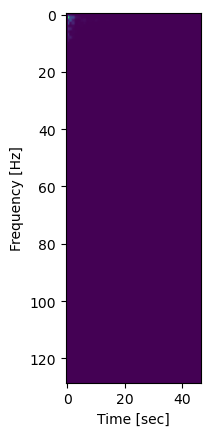

In [21]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('../audio/mir_datasets/mridangam_stroke_1.5/E/231100__akshaylaya__thi-e-342.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

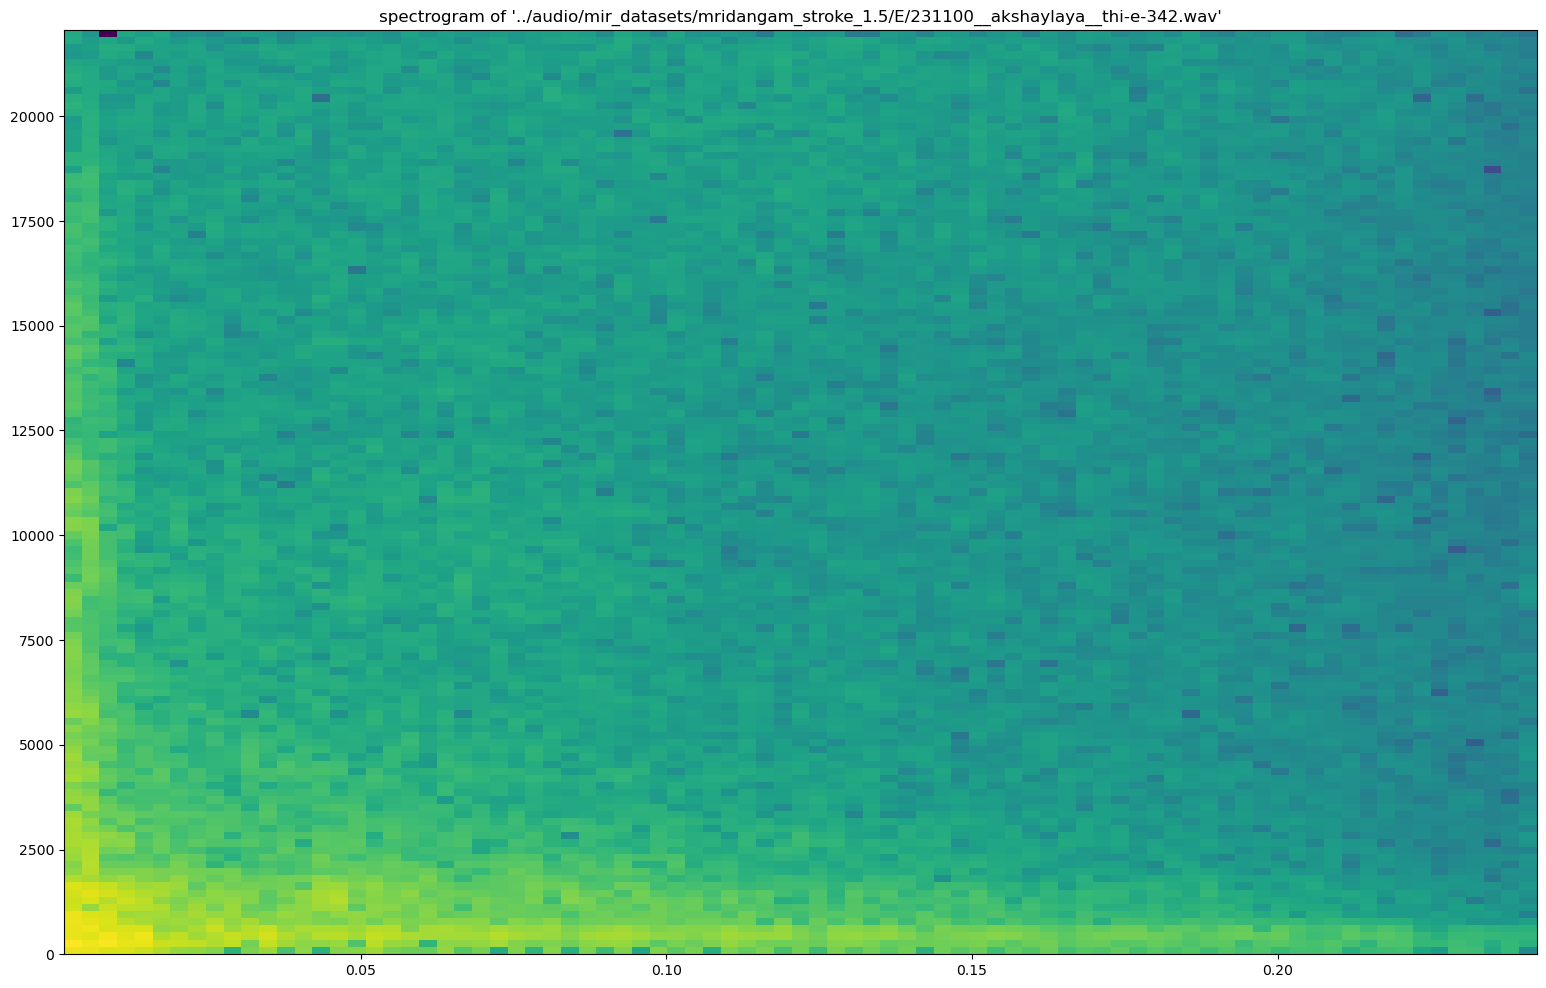

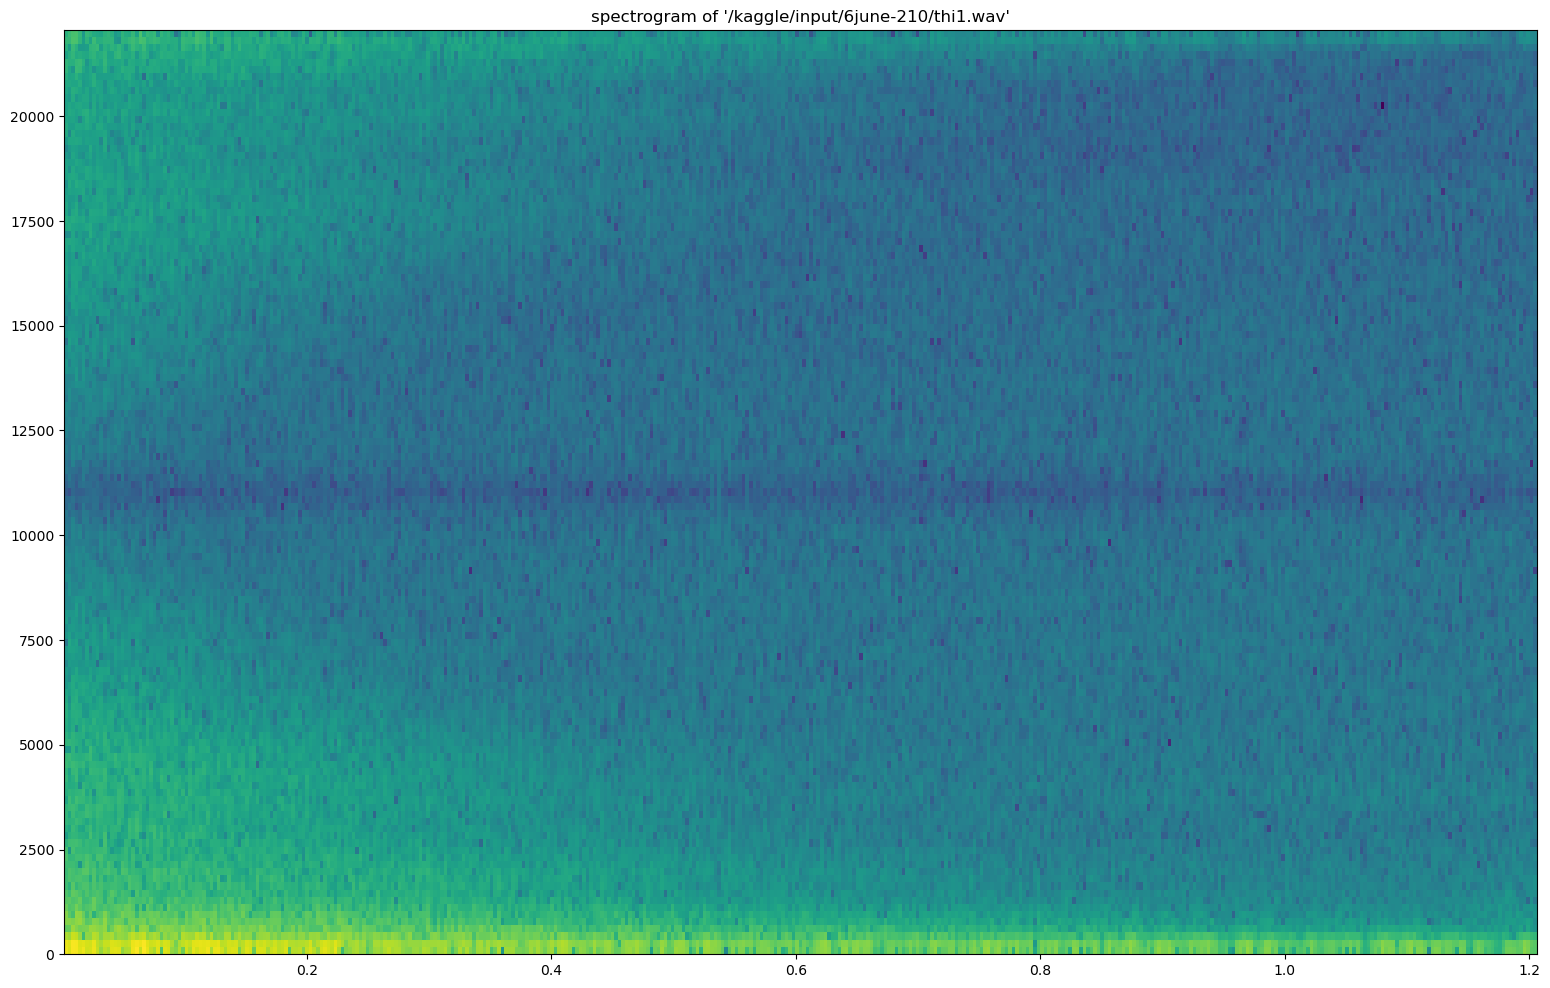

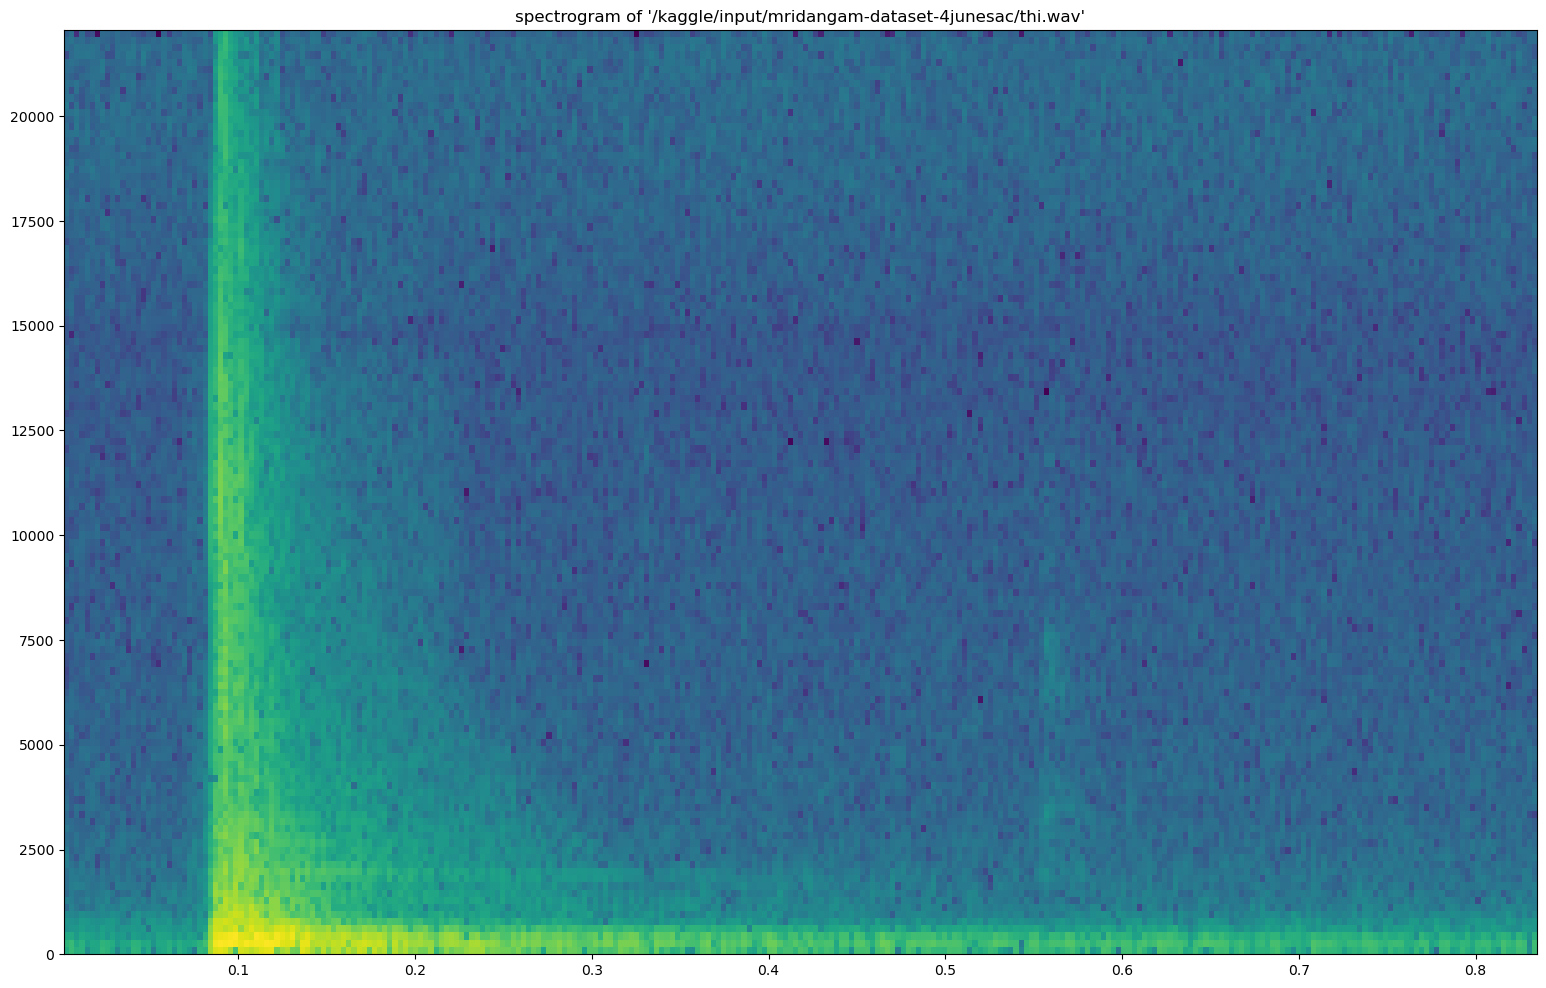

In [22]:
import os
import wave

import pylab
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram.png')
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate
graph_spectrogram('../audio/mir_datasets/mridangam_stroke_1.5/E/231100__akshaylaya__thi-e-342.wav')
graph_spectrogram("/kaggle/input/6june-210/thi1.wav")
graph_spectrogram("/kaggle/input/mridangam-dataset-4junesac/thi.wav")

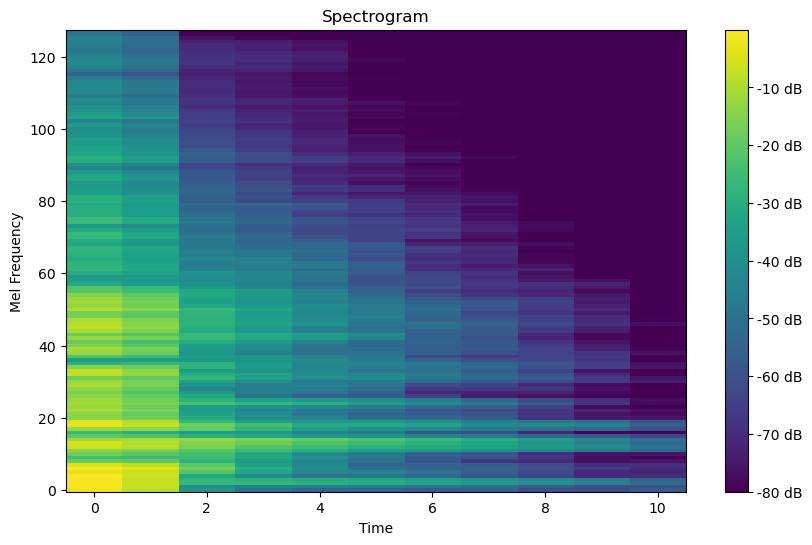

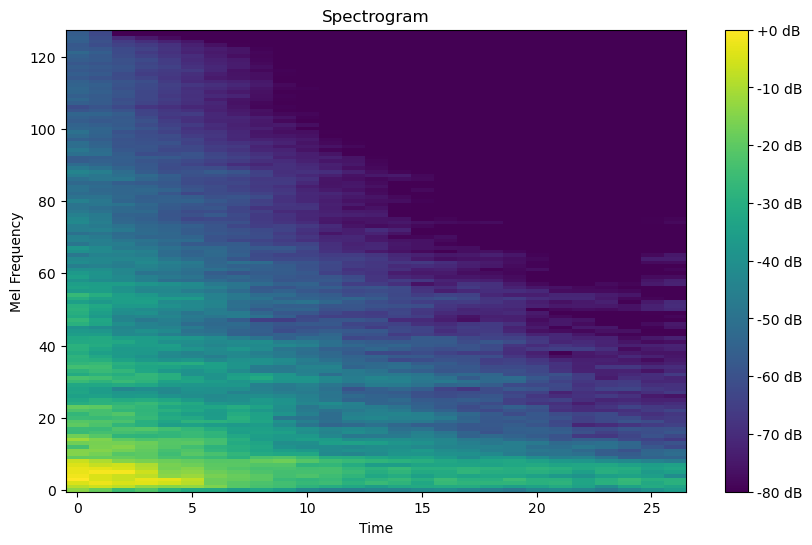

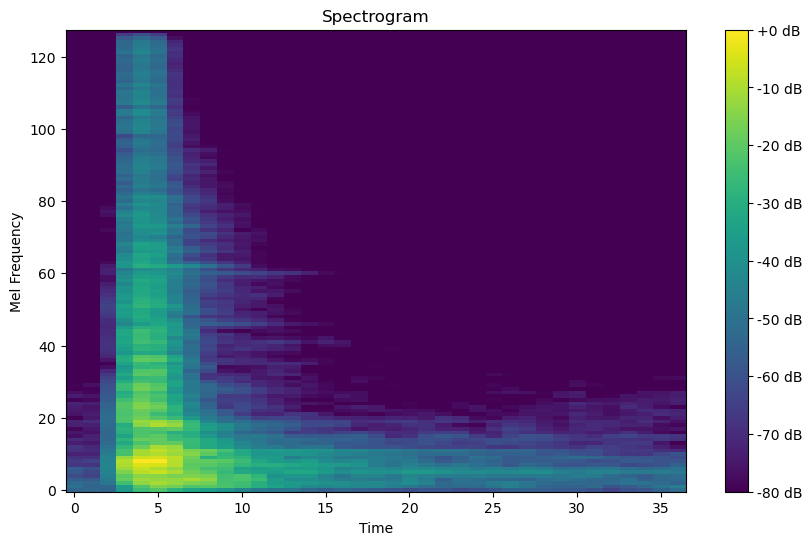

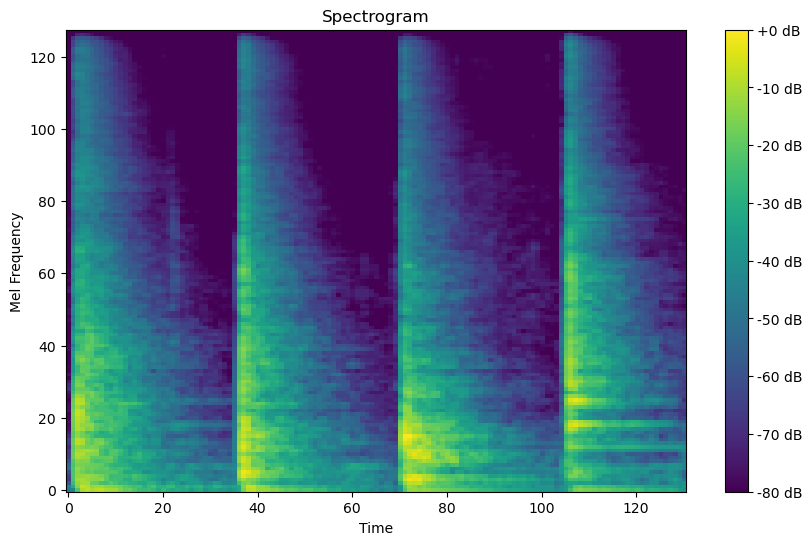

In [23]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the .wav file
audio_file1 = r'../audio/mir_datasets/mridangam_stroke_1.5/E/231100__akshaylaya__thi-e-342.wav'
audio_file2 = r"/kaggle/input/6june-210/thi1.wav"
audio_file3 = r"/kaggle/input/mridangam-dataset-4junesac/thi.wav"
audio_file4 = r"/kaggle/input/6june-210/tha_thi_thom_num1.wav"
# Compute the spectrogram
for audio_file in [audio_file1,audio_file2,audio_file3,audio_file4]:
    waveform, sample_rate = librosa.load(audio_file)

# Compute the spectrogram
    spectrogram = librosa.feature.melspectrogram(waveform, sr=sample_rate, n_fft=2048, hop_length=512)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # Display the spectrogram
    plt.figure(figsize=(10, 6))
    plt.imshow(spectrogram_db, origin='lower', aspect='auto', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Mel Frequency')
    plt.show()


Below is done to get unique files for each of the stroke in each of the tonic to get it named or mapped from our notation to theirs

In [24]:
track_1=mridangam_tracks['228463']
unique_tracks={}
path='../audio/mir_datasets/mridangam_stroke_1.5/'
for tonic in os.listdir(path):
    if tonic==".DS_Store":
        continue
    d={}
    for track in os.listdir(path+tonic+'/'):
        if ".wav" in track:
            track_id=track.split("__")[0]
            track_stroke=track.split("__")[2].split("-")[0]
            if len(track_id)!=6:
                continue
            if track_stroke not in d:
                d[track_stroke]=[track_id,mridangam_tracks[track_id].audio_path]
    unique_tracks[tonic]=d

In [25]:
for tonic in unique_tracks:
    print(tonic)
    for track_d in unique_tracks[tonic]:
        print(track_d,unique_tracks[tonic][track_d][0])

D
thi 228495
ta 227837
thom 228564
cha 227720
tha 228032
tham 228218
dheem 227756
dhin 227774
num 227788
D#
dhin 228855
thom 230131
num 229016
dheem 228792
tha 229452
thi 229685
tham 229559
ta 229206
bheem 228637
cha 228681
E
bheem 230150
tham 230752
thom 231194
ta 230465
tha 230671
dhin 230381
thi 231073
cha 230169
dheem 230248
num 230403
B
tha 224560
dhin 224264
thom 225291
thi 224811
dheem 224188
tham 224725
cha 224044
ta 224475
num 224294
bheem 224030
C
ta 225712
thom 226455
cha 225367
thi 226084
tham 226017
dheem 225458
tha 225884
num 225546
dhin 225512
bheem 225358
C#
tham 227226
thi 227404
num 226716
thom 227682
dhin 226675
tha 227030
dheem 226598
ta 226782
cha 226538
bheem 226488


## Below is the model.py file in compIAM/compiam/timbre/stroke_classification/mridangam_stroke_classification/. This is put here to alter and understand the code

In [26]:
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from compiam.timbre.stroke_classification.mridangam_stroke_classification import (
    normalise_features,
)
from compiam.utils import get_logger

logger = get_logger(__name__)


class StrokeClassification:
    """Mridangam stroke classification."""

    def __init__(self):
        """Mridangam stroke classification init method.

        :param data_home: folder where the dataset is stored.
        :param version:  version of the dataset to use.
        """

    def train(
        self,
        trainig_data,
        feature_list,
        model_type="svm",
        balance=False,
        balance_ref="random",
    ):
        """Train a support vector machine for stroke classification.

        :param trainig_data: DataFrame including features to train.
        :param feature_list: list of features considered for training.
        :param model_type: type of model to train.
        :param balance: balance the number of instances per class to prevent biases.
        :param balance_ref: reference class for data balancement.
        :returns: a trained scikit learn classificator object.
        """

        if trainig_data is None:
            raise ValueError(
                "Prior to train the model please load the dataset using .process_strokes()"
            )

        # Let's use sklearn's preprocessing tools for applying normalisation to features
        data_modif = normalise_features(trainig_data, feature_list)

        if balance == True:
            strokes = trainig_data.stroke.unique()
            count_dict = trainig_data["stroke"].value_counts().to_dict()
            min_stroke = min(count_dict, key=count_dict.get)
            min_number = (
                data_modif.stroke.value_counts()[min_stroke]
                if balance_ref == "lower"
                else data_modif.stroke.value_counts()[random.choice(strokes)]
            )
            reshaped_stroke_list = []
            for strk in strokes:
                if count_dict[strk] > min_number:
                    reshaped_stroke_list.append(
                        data_modif[data_modif.stroke == strk].sample(n=min_number)
                    )
                else:
                    reshaped_stroke_list.append(data_modif[data_modif.stroke == strk])
            # Merging after downsampling
            data_modif = pd.concat(reshaped_stroke_list)

        X = data_modif.iloc[:, : len(feature_list) - 1].values
        # Creating output values
        data_modif.stroke = pd.Categorical(
            data_modif.stroke
        )  # convert to categorical data
        y = np.array(data_modif.stroke.cat.codes)  # create label encoded outputs

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=42
        )

        if model_type == "svm":
            clf = svm.SVC(gamma=1 / (X_train.shape[-1] * X_train.var()))
        elif model_type == "mlp":
            clf = MLPClassifier(alpha=1, max_iter=1000)
        else:
            raise ValueError(
                "Model not available. Please check the available options in the documentation."
            )

        # Fit model with training data
        clf.fit(X_train, y_train)

        # Evaluate
        y_pred = clf.predict(X_test)
        logger.info(
            "{} model successfully trained with accuracy {}% in the testing set".format(
                model_type.upper(),
                round(np.sum(y_test == y_pred) / len(y_pred) * 100),
                2,
            )
        )
        return clf

## PART WRITTEN AS A ROUGH TO UNDERSTAND THE CODE FROM COMPIAM

In [27]:
import tqdm
file_dict={"thi":["/kaggle/input/6june-210/thi1.wav","/kaggle/input/mridangam-dataset-4junesac/thi.wav"]}
?tqdm.tqdm

In [28]:
import essentia.standard as estd
?estd.MonoLoader

In [29]:
help(estd.FrameGenerator)

Help on class FrameGenerator in module essentia.algorithms:

class FrameGenerator(builtins.object)
 |  FrameGenerator(audio, frameSize=1024, hopSize=512, startFromZero=False, validFrameThresholdRatio=0.0, lastFrameToEndOfFile=False)
 |  
 |  # FrameGenerator
 |  
 |  Methods defined here:
 |  
 |  __init__(self, audio, frameSize=1024, hopSize=512, startFromZero=False, validFrameThresholdRatio=0.0, lastFrameToEndOfFile=False)
 |  
 |  __iter__(self)
 |  
 |  __next__(self)
 |  
 |  frame_times(self, sampleRate)
 |  
 |  next = __next__(self)
 |  
 |  num_frames(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __struct__ = {'category': 

In [30]:
?estd.Energy

In [31]:
for frame in estd.FrameGenerator(estd.MonoLoader(filename="/kaggle/input/6june-210/thi1.wav", sampleRate=SPLIT_PARAMS.get("fs"))(),frameSize=SPLIT_PARAMS.get("windowSize"),
        hopSize=SPLIT_PARAMS.get("hopSize"),
        startFromZero=True,):
    print(estd.Energy()(frame))

107.92423248291016
104.31431579589844
96.05916595458984
46.923213958740234
68.82577514648438
59.296199798583984
33.088626861572266
22.50693130493164
27.605995178222656
21.472867965698242
4.192165374755859
4.011431694030762
2.4499292373657227
2.7773091793060303
2.656568765640259
1.9260305166244507
2.1391711235046387
1.8474502563476562
0.9361879825592041
0.9423770308494568
0.9312758445739746
0.9841888546943665
0.5942480564117432
0.2965956926345825
0.25231969356536865
0.3415605425834656
0.4642634093761444
0.3540355861186981
0.20616604387760162
0.20278263092041016
0.20582126080989838
0.3398745059967041
0.39656251668930054
0.21806542575359344
0.19258742034435272
0.20558232069015503
0.27071717381477356
0.30600038170814514
0.22275884449481964
0.15961681306362152
0.23419754207134247
0.2428162544965744
0.10988155752420425
0.057589199393987656
0.06715329736471176
0.16202758252620697
0.29369744658470154
0.24046927690505981
0.12520691752433777
0.0655842274427414
0.11076284945011139


In [32]:
for frame in estd.FrameGenerator(estd.MonoLoader(filename="/kaggle/input/mridangam-dataset-4junesac/thi.wav", sampleRate=SPLIT_PARAMS.get("fs"))(),frameSize=SPLIT_PARAMS.get("windowSize"),
        hopSize=SPLIT_PARAMS.get("hopSize"),
        startFromZero=True,):
    print(estd.Energy()(frame))

0.004279486835002899
0.0024521173909306526
0.0027674157172441483
0.002100280486047268
0.001484030857682228
0.002600874751806259
228.94223022460938
568.783935546875
648.7339477539062
535.5203247070312
325.48583984375
134.8453826904297
54.20233154296875
44.055755615234375
46.86176681518555
29.070714950561523
10.895923614501953
4.806000232696533
4.1220502853393555
5.7584404945373535
4.002202033996582
0.9116824269294739
0.8030596375465393
0.7017030715942383
0.5511048436164856
0.3765674829483032
0.5701481103897095
0.41072583198547363
0.2626374661922455
0.22472940385341644
0.1168622225522995
0.12971974909305573
0.08939331769943237
0.1477278769016266
0.13594485819339752
0.06035265326499939
0.043812096118927
0.0408770926296711
0.08639755845069885
0.11184903979301453
0.08418102562427521
0.07000988721847534
0.06030388921499252
0.027402076870203018
0.03440156579017639
0.0383453331887722
0.026375722140073776
0.03371553495526314
0.03538629412651062
0.029985543340444565
0.026690982282161713
0.027326

In [33]:
for frame in estd.FrameGenerator(estd.MonoLoader(filename="../audio/mir_datasets/mridangam_stroke_1.5/E/231100__akshaylaya__thi-e-342.wav", sampleRate=SPLIT_PARAMS.get("fs"))(),frameSize=SPLIT_PARAMS.get("windowSize"),
        hopSize=SPLIT_PARAMS.get("hopSize"),
        startFromZero=True,):
    print(estd.Energy()(frame))

8.685027122497559
0.9989816546440125
0.32797449827194214
0.20269975066184998
0.11052711308002472
0.059381645172834396
0.04515482485294342
0.0267132930457592
0.021035775542259216
0.014930580742657185
0.011106543242931366
0.006601227447390556
0.0034895408898591995
0.0027665840461850166
0.0012662000954151154
0.0010377950966358185
0.00048264581710100174
0.00023460574448108673
0.00011504441499710083
2.0071864128112793e-05
8.413568139076233e-06


In [34]:
print_statements=["Their data top 15 values","Our data on 4th June top 15 values","Our data on 6th June top 15 values"]
directory_list=["../audio/mir_datasets/mridangam_stroke_1.5/E/","/kaggle/input/mridangam-dataset-4junesac/","/kaggle/input/6june-210/"]
n=3
for i in range(n):
    print(print_statements[i])
    l=[]
    for file in os.listdir(directory_list[i]):
        if ".wav" not in file:
            continue
        NRG=(sorted([estd.Energy()(frame) for frame in estd.FrameGenerator(estd.MonoLoader(filename=directory_list[i]+file, sampleRate=SPLIT_PARAMS.get("fs"))(),frameSize=SPLIT_PARAMS.get("windowSize"),
            hopSize=SPLIT_PARAMS.get("hopSize"),
            startFromZero=True,)])[-3:])
        NRG = np.array(NRG)
        NRG = NRG / np.max(NRG)
        l.extend(sorted(NRG)[-3:])
    print(sorted(l)[:15])

Their data top 15 values
[0.006981344689006025, 0.007876964578998976, 0.00822920232854769, 0.00824041685724211, 0.00861873499970755, 0.008907803257350671, 0.009067617929146695, 0.009277769783808664, 0.009430618271524067, 0.009710443541842074, 0.009758204798881925, 0.00985481489414935, 0.010106970440416791, 0.010187353394903384, 0.01026876484944856]
Our data on 4th June top 15 values
[0.45444543845218777, 0.4796838716384176, 0.6532616586957819, 0.6843788353526142, 0.6866771607007999, 0.6979177006480974, 0.746137426805756, 0.7615139554664435, 0.793730404145589, 0.8185254827766757, 0.8254852803081272, 0.8539685604594877, 0.876759937592537, 0.906440156263661, 0.9103304932062157]
Our data on 6th June top 15 values
[0.2466690672774169, 0.38757704417854477, 0.4010311708781535, 0.4069434479753675, 0.40905093036425333, 0.4165709698067116, 0.424662564045389, 0.43524604368234326, 0.45160593211363903, 0.504712965578984, 0.527317224212201, 0.5556376395227038, 0.5812858752250883, 0.5827267642370584,

## OUR ENERGY VALUES ARE TOO MUCH HIGHER THAN THEIRS, CAUSING ERRORS IN PREDICTING.

In [35]:
SPLIT_PARAMS

{'fs': 44100, 'windowSize': 1024, 'hopSize': 512, 'NRG_threshold_ratio': 0.005}

In [36]:

for NRG_threshold_ratio in [0.3,0.03,0.003]:
    print("THRESHOLD RATIO :",NRG_threshold_ratio)
    for filename in ["../audio/mir_datasets/mridangam_stroke_1.5/E/231100__akshaylaya__thi-e-342.wav","/kaggle/input/mridangam-dataset-4junesac/thi.wav","/kaggle/input/6june-210/thi1.wav","/kaggle/input/6june-210/tha_thi_thom_num1.wav"]:
        print(filename.split("/")[-1],"attributes obtained are : ")
        x = estd.MonoLoader(filename=filename, sampleRate=SPLIT_PARAMS.get("fs"))()
        NRG = []
        # Main windowing and feature extraction loop
        for frame in estd.FrameGenerator(
            x,
            frameSize=SPLIT_PARAMS.get("windowSize"),
            hopSize=SPLIT_PARAMS.get("hopSize"),
            startFromZero=True,
        ):
            NRG.append(estd.Energy()(frame))
        NRG = np.array(NRG)
        NRG = NRG / np.max(NRG)

        # Applying energy threshold to decide wave split boundaries
        split_decision_func = np.zeros_like(NRG)
        split_decision_func[NRG > NRG_threshold_ratio] = 1
        # Setting segment boundaries
        # Inserting a zero at the beginning since we will decide the transitions using a diff function
        split_decision_func = np.insert(split_decision_func, 0, 0)
        diff_split_decision = np.diff(split_decision_func)
        # Start indexes: transition from 0 to 1
        start_indexes = np.nonzero(diff_split_decision > 0)[0] * SPLIT_PARAMS.get("hopSize")
        # Stop indexes: transition from 1 to 0
        stop_indexes = np.nonzero(diff_split_decision < 0)[0] * SPLIT_PARAMS.get("hopSize")
        print(start_indexes, stop_indexes)
    print()

THRESHOLD RATIO : 0.3
231100__akshaylaya__thi-e-342.wav attributes obtained are : 
[0] [512]
thi.wav attributes obtained are : 
[3072] [5632]
thi1.wav attributes obtained are : 
[0] [3584]
tha_thi_thom_num1.wav attributes obtained are : 
[  1536  36864  72192 108032] [  2560  38400  75776 109056]

THRESHOLD RATIO : 0.03
231100__akshaylaya__thi-e-342.wav attributes obtained are : 
[0] [1536]
thi.wav attributes obtained are : 
[3072] [8192]
thi1.wav attributes obtained are : 
[0] [6144]
tha_thi_thom_num1.wav attributes obtained are : 
[  1536   8704  36864  72192  80896 107520] [  8192   9728  43008  80384  81920 112640]

THRESHOLD RATIO : 0.003
231100__akshaylaya__thi-e-342.wav attributes obtained are : 
[0] [4096]
thi.wav attributes obtained are : 
[3072] [10752]
thi1.wav attributes obtained are : 
[    0 12800 15872] [11776 14336 16896]
tha_thi_thom_num1.wav attributes obtained are : 
[  1536  36864  71680 107520] [ 15360  49152  88064 117248]



In [37]:
file_dict

{'thi': ['/kaggle/input/6june-210/thi1.wav',
  '/kaggle/input/mridangam-dataset-4junesac/thi.wav']}

In [38]:
first_one=True
columns = []
list_of_feat = []
for stroke, files in tqdm.tqdm(file_dict.items()):
    for sample_file in files:
        # Get file id
        (x, _, _, start_indexes, stop_indexes) = split_file(sample_file)
        for start, stop in zip(start_indexes, stop_indexes):
            x_seg = x[start:stop]
            # Final check for amplitude (to avoid silent segments selection due to noise in split function)
            if np.max(np.abs(x_seg)) > 0.05:
                # Amplitude normalisation
                x_seg = x_seg / np.max(np.abs(x_seg))
                # Compute and write features for file
                features = estd.Extractor(
                    dynamics=False,
                    rhythm=False,
                    midLevel=False,
                    highLevel=False,
                )(x_seg)
                feat = []
                # Get descriptor names
                descriptors = features.descriptorNames()
                # Remove uneeded descriptors
                for desc in DESCRIPTORS_TO_DISREGARD:
                    descriptors = [x for x in descriptors if desc not in x]
                # Process MFCC
                for i in np.arange(np.shape(features["lowLevel.mfcc"])[1]):
                    if first_one:
                        columns.append("mfcc" + str(i) + ".mean")
                        columns.append("mfcc" + str(i) + ".dev")
                    feat.append(np.mean(features["lowLevel.mfcc"][:, i]))
                    feat.append(np.std(features["lowLevel.mfcc"][:, i]))
                # Now remove already computed mfcc
                descriptors = [x for x in descriptors if "mfcc" not in x]
                for desc in descriptors:
                    if first_one:
                        columns.append(desc + ".mean")
                        columns.append(desc + ".dev")
                    feat.append(np.mean(features[desc]))
                    feat.append(np.std(features[desc]))
                feat.append(stroke)
                list_of_feat.append(feat)
                if first_one:
                    columns = columns + ["stroke"]
                    feature_list = columns
                    first_one = False
# Convert list of features to dict and write to file
df_features = pd.DataFrame(list_of_feat, columns=columns)
# computed_path="/kaggle/working/computed_features"+
# df_features.to_csv(computed_path, index=False)

100%|██████████| 1/1 [00:00<00:00, 15.06it/s]


In [39]:
df_features.columns

Index(['mfcc0.mean', 'mfcc0.dev', 'mfcc1.mean', 'mfcc1.dev', 'mfcc2.mean',
       'mfcc2.dev', 'mfcc3.mean', 'mfcc3.dev', 'mfcc4.mean', 'mfcc4.dev',
       'mfcc5.mean', 'mfcc5.dev', 'mfcc6.mean', 'mfcc6.dev', 'mfcc7.mean',
       'mfcc7.dev', 'mfcc8.mean', 'mfcc8.dev', 'mfcc9.mean', 'mfcc9.dev',
       'mfcc10.mean', 'mfcc10.dev', 'mfcc11.mean', 'mfcc11.dev', 'mfcc12.mean',
       'mfcc12.dev', 'lowLevel.barkbands_kurtosis.mean',
       'lowLevel.barkbands_kurtosis.dev', 'lowLevel.barkbands_skewness.mean',
       'lowLevel.barkbands_skewness.dev', 'lowLevel.barkbands_spread.mean',
       'lowLevel.barkbands_spread.dev', 'lowLevel.dissonance.mean',
       'lowLevel.dissonance.dev', 'lowLevel.hfc.mean', 'lowLevel.hfc.dev',
       'lowLevel.pitch.mean', 'lowLevel.pitch.dev',
       'lowLevel.pitch_instantaneous_confidence.mean',
       'lowLevel.pitch_instantaneous_confidence.dev',
       'lowLevel.pitch_salience.mean', 'lowLevel.pitch_salience.dev',
       'lowLevel.silence_rate_20dB.me

In [40]:
os.listdir("/kaggle/working")

['spectrogram.png', '__notebook__.ipynb']